авторегрессионная модель прогноза для g series

Недоделано

In [2]:
# Импорт библиотек
import numpy as np
import pandas as pd

# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
# Задаем рабочую папку

import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_3_forecast/_0_forecasting data/04_series_g")


In [4]:
# Импорт обучающей выборки
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)


In [5]:
#  Знакомимся с данными
ser_g.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [6]:
#  Знакомимся с данными
ser_g.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


In [7]:
#  Знакомимся с данными
ser_g.shape

(144, 2)

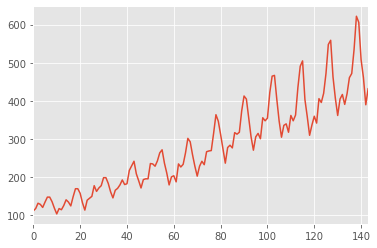

In [8]:
#  График, чтобы ответить на 4 вопроса
ser_g.iloc[:,1].plot()


In [9]:
#  Модели удобнее прогнозировать логарифмы ряда, 
ser_g['log_y'] = np.log10(ser_g['series_g'])

Text(0, 0.5, 'log10 от тысяч человек')

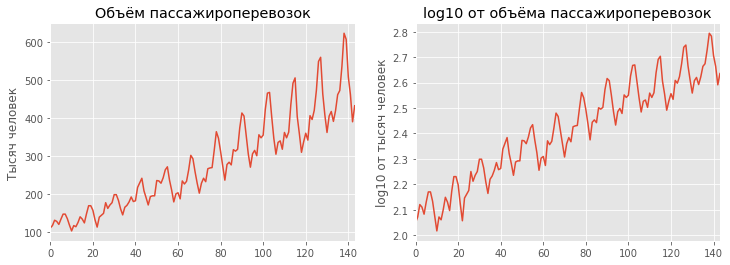

In [10]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ser_g['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')


In [11]:
#   Преобразуем данные
#   Создаем предикторы (авторегрессионные)

ser_g_2 = pd.DataFrame()

for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)

ser_g_2['t'] = ser_g.iloc[:,2].values

print(ser_g_2.head(13))




        t-12      t-11      t-10       t-9       t-8       t-7       t-6  \
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN       NaN       NaN       NaN  2.049218   
7        NaN       NaN       NaN       NaN       NaN  2.049218  2.071882   
8        NaN       NaN       NaN       NaN  2.049218  2.071882  2.120574   
9        NaN       NaN       NaN  2.049218  2.071882  2.120574  2.110590   
10       NaN       NaN  2.049218  2.071882  2.120574  2.110590  2.082785   
11       NaN  2.049218  2.071882  2.120574  2.110590  2.082785  2.130334   
12  2.049218

In [12]:
#  Все нормально?
ser_g_2.tail(13)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
131,2.527630,2.556303,2.534026,2.608526,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455
132,2.556303,2.534026,2.608526,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136
133,2.534026,2.608526,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177
134,2.608526,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214
135,2.597695,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701
136,2.623249,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942
137,2.673942,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942,2.728354
138,2.738781,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942,2.728354,2.793790
139,2.747412,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942,2.728354,2.793790,2.782473
140,2.665581,2.609594,2.558709,2.607455,2.620136,2.592177,2.622214,2.663701,2.673942,2.728354,2.793790,2.782473,2.705864


In [13]:
#  Отрезаем первые 12 строк - там пропуски
ser_g_4 = ser_g_2[12:]

#  Все нормально?
ser_g_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334,2.096910


In [34]:
#  предикторы и отклик разделяем
# Отклик  вектор y
y = ser_g_4['t']
# Предикторы - таблица X
X = ser_g_4.drop('t', axis=1)

Если есть дополнительные предикторы, добавляем их сейчас

In [35]:
X.shape

(132, 12)

In [36]:
X.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,2.049218,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882
13,2.071882,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698
14,2.120574,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371
15,2.110590,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219
16,2.082785,2.130334,2.170262,2.170262,2.133539,2.075547,2.017033,2.071882,2.060698,2.100371,2.149219,2.130334


In [39]:
#  Возможно, лишнее преобразование.
#  Оно нужно в нейронных сетях и (возможно ) XGBoost

y1 = y.values
X1 = X.values

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
model = RandomForestRegressor(random_state=42,
                               # число деревьев в лесу
                               n_estimators=150,
                               # функция для impurity
                               criterion='mse',
                               # то ли число слоев, то ли число расщеплений  
                               #  ?????????????????  но не число узлов
                               max_depth=10,
                               # сколько переменных использовать при построении дерева?
                               # sqrt(k)
                               max_features=10, 
                               # максимальное число конечных узлов. Сейчас - без ограничений
                               max_leaf_nodes=None,
                               # минимальное уменьшение загрязнения 
                               min_impurity_decrease=0.0, 
                                # Дерево обучается по части наблюдений (По какой???)
                               bootstrap=True, 
                               # минимальное число наблюдений в узле потомке
                               min_samples_leaf=1, 
                               # минимальное число наблюдений в узле родителе
                               min_samples_split=2,
                               # параметр используется редко, самостоятельно
                               min_weight_fraction_leaf=0.0, 
                               # объем промежуточных результатов в ходе обучения
                               verbose=1, 
                               # число используемых процессоров
                               # n_jobs=None,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False)

model.fit(X1, y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=True, random_state=42, verbose=1,
                      warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


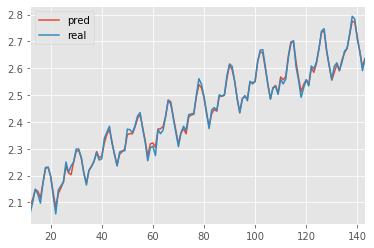

In [42]:
#  Сравним подгонку и ряд

pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': y})
pred.plot()

Почему прогноз будет плохой? <br>
Что надо сделать, чтобы получить разумный прогноз?

DS и TS ряды


###  Прогнозирование на одно наблюдение вперед

In [22]:
#  Неправильно
X_for = X.iloc[131 , :]

In [43]:
X_2 = X1[None, 131 , :]

In [44]:
X_2

array([[2.60745502, 2.62013605, 2.59217676, 2.62221402, 2.66370093,
        2.673942  , 2.72835378, 2.79379038, 2.78247262, 2.70586371,
        2.66370093, 2.59106461]])

In [45]:
f_1 = model.predict(X_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [46]:
f_1

array([2.6361959])

Далее: надо подобрать внешние параметры, например число деревьев.
    30 деревьев дают плохую подгонку, 60 получше, но возможно переобучают... <br>
    
Кросс-валидация. <br>
Для временных рядов она нестандартная


Популярная процедура <br>
from sklearn.model_selection import TimeSeriesSplit

Что в ней не так?


###  Прогнозирование на 12 наблюдений вперед

In [47]:
horizon_ = 12

a = []

In [49]:
for i in range(horizon_):
    f_2 = model.predict(X_2)
    a.append(f_2)
    zzz = np.append(X_2[0, :], f_2)
    X_2[0, :] = np.delete(zzz, 0)
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [50]:
a

[array([2.6361959]),
 array([2.6361959]),
 array([2.65745993]),
 array([2.65218365]),
 array([2.66969771]),
 array([2.71589651]),
 array([2.74508114]),
 array([2.76934479]),
 array([2.77416152]),
 array([2.77247685]),
 array([2.75963803]),
 array([2.71689854]),
 array([2.65458786])]

In [52]:
X_2[0, :]

array([2.6361959 , 2.65745993, 2.65218365, 2.66969771, 2.71589651,
       2.74508114, 2.76934479, 2.77416152, 2.77247685, 2.75963803,
       2.71689854, 2.65458786])

In [30]:
X_2.dtype.names

In [38]:
X1.dtype.names

In [48]:
f_2 = model.predict(X_2)
a.append(f_2)
zzz = np.append(X_2[0, :], f_2)
X_2[1, :] = np.delete(zzz, 0)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


IndexError: index 1 is out of bounds for axis 0 with size 1

In [58]:
vali

NameError: name 'vali' is not defined

In [61]:
valid_1 = range(12, 144, 1)

In [62]:
forecast_3 = pd.DataFrame(10**model.predict(X1), index = valid_1, columns=['Fit'])


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [66]:
valid_2 = range(144, 156, 1)

In [67]:
forecast_4 = pd.DataFrame(10**X_2[0, :], index = valid_2, columns=['Forecast'])


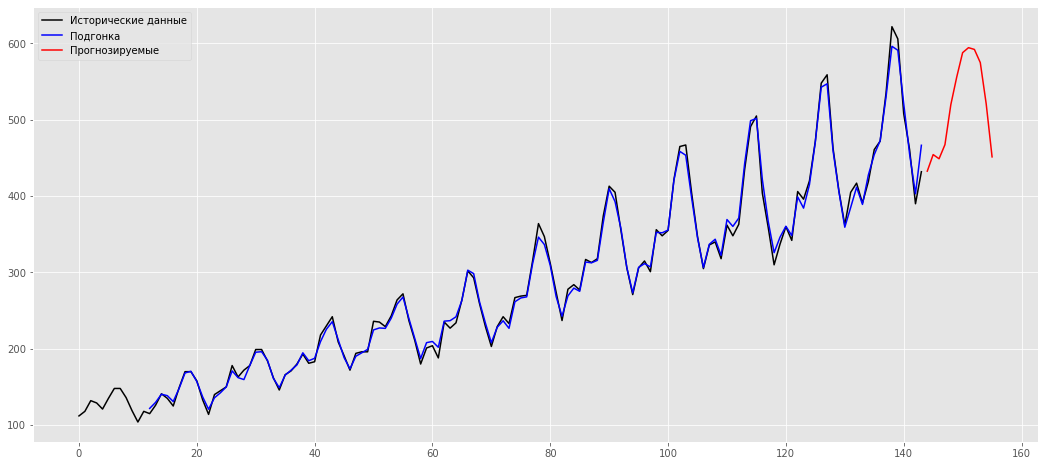

In [68]:
#  По прогнозу для логарифмов вычисляем прогноз для исходного ряда

#   Проверяем качество прогноза для исходного ряда
#   Строим графики

#  Указываем размер картинки
plt.figure(figsize=(18, 8))


#  график исходного ряда
plt.plot(ser_g['series_g'], label='Исторические данные', c = 'black')
#  график прогноза
plt.plot(forecast_3, label='Подгонка', c = 'blue')
plt.plot(forecast_4, label='Прогнозируемые', c = 'red')

plt.legend(loc='best')

plt.show()



In [56]:
model.predict(X1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


array([2.08583874, 2.11296758, 2.14750269, 2.14158604, 2.11675018,
       2.17034966, 2.22605973, 2.23171273, 2.19619445, 2.13636826,
       2.0818917 , 2.13279938, 2.15307117, 2.17625258, 2.23296764,
       2.21007758, 2.20311552, 2.25089261, 2.29105099, 2.29260309,
       2.26691406, 2.2075306 , 2.17328787, 2.2185782 , 2.23532236,
       2.25255781, 2.28943023, 2.26564491, 2.27298688, 2.32090417,
       2.35329502, 2.37198574, 2.32615092, 2.27526177, 2.23963608,
       2.27922828, 2.28933253, 2.29926112, 2.35160401, 2.35651227,
       2.35548239, 2.38021874, 2.41246748, 2.42775732, 2.37976928,
       2.32955614, 2.27246236, 2.31804379, 2.32134506, 2.30524719,
       2.37323607, 2.37439493, 2.38361732, 2.42055462, 2.48141888,
       2.47489572, 2.41710276, 2.3682619 , 2.31803266, 2.35824537,
       2.37416571, 2.35562942, 2.41758527, 2.42582743, 2.42815755,
       2.49317552, 2.53941898, 2.52711559, 2.49033526, 2.42868461,
       2.38498101, 2.430248  , 2.4463529 , 2.4397641 , 2.49641